In [20]:
!pip install quandl

  Created wheel for inflection: filename=inflection-0.3.1-cp37-none-any.whl size=6075 sha256=4051ddabde6319d41e04ecd9f4f0e06d42fb9e90a89cf2ffbda570123ce49094
  Stored in directory: /home/igna/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [21]:
import pandas as pd
import requests
import quandl


In [22]:
api_key='o2eSDNtdGRxZ4F59ep39'

In [23]:
quandl.ApiConfig.api_key = api_key

In [7]:
symbol='ADYEN'

In [12]:
url=f'https://www.quandl.com/api/v3/datasets/EURONEXT/{symbol}.json?api_key={api_key}'

In [19]:
res = requests.get(url).json()

In [35]:
quandl.get("EURONEXT/AED")

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2014-02-14,51.67,51.75,50.91,50.91,7354.0,376138.22
2014-02-17,51.00,51.80,51.00,51.40,4910.0,253044.35
2014-02-18,51.40,51.66,51.02,51.04,9160.0,470617.66
2014-02-19,51.04,51.30,50.92,51.23,8805.0,450087.74
2014-02-20,51.17,51.60,51.00,51.60,7647.0,391819.47
...,...,...,...,...,...,...
2020-02-18,134.60,136.60,133.80,136.40,32814.0,4450878.00
2020-02-19,136.60,139.20,134.40,134.80,53018.0,7205130.00
2020-02-20,134.80,136.20,132.80,133.40,67975.0,9097888.00


In [8]:
import yfinance as yf

In [9]:
ticker_list = 'GS BAC'

In [10]:
tickers = yf.Tickers(ticker_list)

In [11]:
df = tickers.download(period='max',start='2007-1-1')['Close']

[*********************100%***********************]  2 of 2 completed


In [12]:
df = df.dropna(how='any')

AttributeError: 'AxesSubplot' object has no attribute 'show'

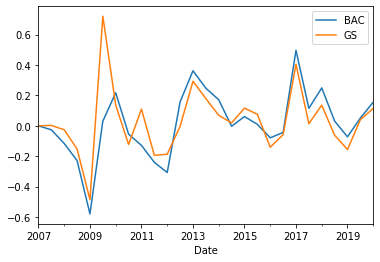

In [13]:
df.resample('2Q').mean().pct_change().fillna(value=0).plot().show()


In [ ]:
df.to_dict(orient='records')[-1]

In [199]:
df = df.dropna(how='any').reset_index()
df['Date']=pd.to_datetime(df['Date']).dt.date

In [187]:
df.columns.levels

FrozenList([['Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume', 'Date'], ['BAC', 'GS', '']])

In [191]:
df.xs('Close', axis=1)

,BAC,GS
0,41.983715,169.978470
1,42.251362,168.394852
2,41.912861,168.564255
3,42.078175,172.527481
4,42.117538,172.823853
...,...,...
3305,34.849998,232.729996
3306,34.360001,230.619995
3307,32.730000,224.539993
3308,31.080000,217.610001


In [148]:
pd.DataFrame.from_dict(di).set_index('Date')

,index,BAC,F,GE,GS
Date,,,,,
1999-05-04,0,16.716362,18.154510,17.404280,56.159458
1999-05-05,1,16.835018,18.225290,18.078066,55.161922
1999-05-06,2,16.493864,17.694454,17.953678,54.214314
1999-05-07,3,16.686689,18.366848,18.233557,59.151947
1999-05-10,4,16.404873,18.136816,18.036606,56.408821
...,...,...,...,...,...
2020-02-19,5232,34.720001,8.000000,12.610000,237.330002
2020-02-20,5233,34.849998,8.030000,12.530000,232.729996
2020-02-21,5234,34.360001,7.890000,12.250000,230.619995
